# $\chi²$ fitting/minimisation

* Both, the LM method and the $\chi²$ method, are optimisation routines to find the best-fit free parameters to describe data.

* They rely on minimizing a functional.

* The $\chi²$ method yields a dimensionless number, while the LM method yields a number with the units of the datapoints.

$\textbf{Both are hypersurfaces to be minimized.}$

The functional of the $\chi²$ method takes into account the dispersion of each data point. There is going to be an error and a distribution (it does not have to be gaussian) associated with each $y_i$. It compares the squares of the LM method with the squares of the error associated with each datapoint. The functional form is

$r \left(p \right) = \frac{y_i - f (x_i,p)}{\sigma_i}$

The point is to find the minimim of the resultant surface
$\frac{Area LM square}{Area Error Square}$ for each data point. We want to find the best value of $p$:

$\chi²_{min} = min \sum_1^N (r(p))^2$

The minimum $\chi²$ statistic per number of degrees of freedom $\nu \left( \nu= \text{sample size} - \text{\# of free parameters} \right)$ of the data points is

$\chi²_{reduced} = \frac{\chi²_{min}}{\nu} $

$\gamma$ is the number of degrees of freedom.

How to judge if the regression is good?
* $\chi²_{reduced}$ is approx. 1 $\rightarrow$ good regression
* $\chi²_{reduced}$ >> 1 $\rightarrow$ underfitting
* $\chi²_{reduced}$ < 1 $\rightarrow$ overfitting (too many free parammeters) or large errors

## Example 1: Simple Pendulum
In the lab, you are normally asked to collect data points for differents lengths and periods of simple pendulum experiments. For each data point, we fix the length of the pendulum, move the pendulum bob by a small angle and release it. Subsequently, we use a chronometer to record the time ot takes for the bob to complete a period. Several measurementes can be collected to build up statistics.

Physical-motivated model for the period of the pendulum,
\begin{equation}
T = 2 \pi \sqrt{\frac{L}{g}}
\end{equation}

\begin{equation}
T = \frac{2 \pi}{\sqrt{g}} \sqrt{L}
\end{equation}

\begin{equation}
T = \beta \sqrt{L}
\end{equation}


## LM regression using the averages

In [15]:
#Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

In [16]:
# Read the data file as a pandas df

def io_data(filename):
    """
    This is an I/O function that opens the pendulum data
    and return data arrays.
    Input: filename (str)
    Outputs: data arrays
    """
    
    # Create a pandas df
    df = pd.read_csv(filename, sep = ",")
    
    # Extract the arrays
    lengthp = np.array(df["Length(m)"])
    period1 = np.array(df["Period1(s)"])
    period2 = np.array(df["Period2(s)"])
    period3 = np.array(df["Period3(s)"])
    period4 = np.array(df["Period4(s)"])
    period5 = np.array(df["Period5(s)"])
    
    return lengthp, period1, period2, period3, period4, period5

In [17]:
file_pendulum = "/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/data_pendulum.csv"
l, p1, p2, p3, p4, p5 = io_data(file_pendulum)
#Safe check
#print(p1)
#print(p2)
#print(p3)
#print(p4)
#print(p5)

In [18]:
#Calculate the mean and std of all the registered periods for each length
new_arr = np.array([p1, p2, p3, p4, p5])

#print(new_arr.shape) #we get a matrix

mean_t = np.mean(new_arr, axis = 0)#the axis argument fixes one of the axis

stdv_t = np.std(new_arr , axis = 0)

#print(mean_t.size) #we get a 1D array
#print(stdv_t.size)

print(mean_t)
print(stdv_t)


[0.578 0.914 1.16  1.288 1.392 1.54  1.656 1.816 1.922 1.984]
[0.04791659 0.01356466 0.01414214 0.016      0.02315167 0.01414214
 0.026533   0.01496663 0.0132665  0.03136877]


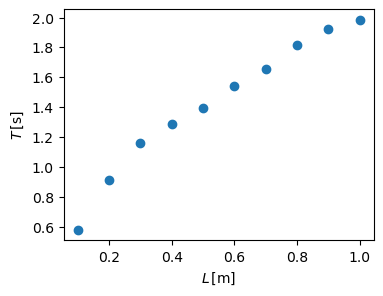

In [19]:
#Let's plot mean period vs. pendulum length
plt.figure(figsize=(4,3))

plt.plot(l, mean_t, marker = "o", linestyle = " ")
#plt.plot(l, p1, marker = "x", linestyle = " ")
#plt.plot(l, p2, marker = "*", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()
plt.close()

## Plotting with errorbars
We can use plt.errorbar()

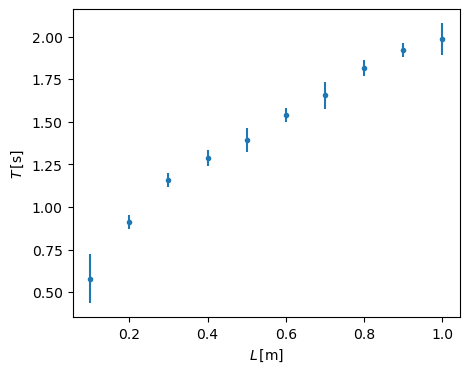

In [20]:
plt.figure(figsize=(5,4))

plt.errorbar(l, mean_t, 3.*stdv_t, 0, marker = ".", linestyle = " ")#the errors are 3sigma, we should indicate this on the report

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()
plt.close()

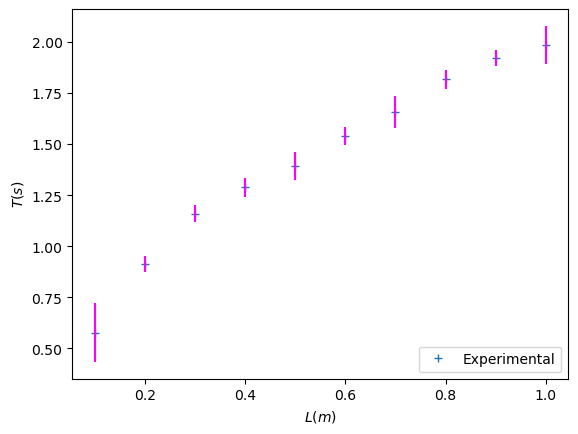

In [21]:
# Plot of the data and each datapoint deviation

fig, ax = plt.subplots()

ax.plot(l, mean_t, linestyle = " ", marker = "+", label = "Experimental")
ax.errorbar(l, mean_t, yerr = 3*stdv_t, linestyle = " ", color = "magenta")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

## 1. Applying the LM method

In [22]:
# Let's calculate these coefficients

# 1. Spearman coefficient -> monoticity
sp = st.spearmanr(l, mean_t)

# 2. Pearson coefficient -> linearity
pe = st.pearsonr(l, mean_t)

print("Spearman:\n", sp[0], "and pvalue:",sp[1])
print("Pearson:\n", pe[0], "and pvalue:",pe[1])

Spearman:
 0.9999999999999999 and pvalue: 6.646897422032013e-64
Pearson:
 0.9817728684255518 and pvalue: 4.7241140371341587e-07


## Physically motivated model:
\begin{equation}
T = \beta \sqrt{L}
\end{equation}

In [23]:
# Model function

def fit_model(x_values, beta):
    """
    This is our regression model.
    Inputs: x_values (lengths), beta -> free param.
    Output: y_values model
    """
    y_values = beta*np.sqrt(x_values)
    
    return y_values

In [24]:
# Call the curve_fit function

coef, cova = opt.curve_fit(fit_model, l, mean_t)

print(coef)

# Calculate uncertainties
unc_coef = np.sqrt(np.diag(cova))

print("The associated uncertainty is:\n", unc_coef)

[2.00651334]
The associated uncertainty is:
 [0.01442027]


In [25]:
# Evaluate l in the regression model
mean_t_fit = fit_model(l, *coef)

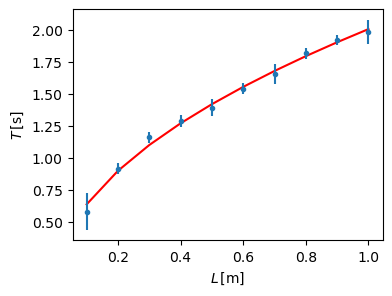

In [26]:
plt.figure(figsize=(4,3))

plt.plot(l, mean_t_fit, color = "red")
plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

In [27]:
print("The acceleration of gravity, g, in m/s^2 is = ", (2*np.pi/coef[0])**2)

The acceleration of gravity, g, in m/s^2 is =  9.805633005035858


## 2. $\chi²$ fitting

## Manual optimization

In [28]:
# Define a functional/chi^2 statistic

def chi_sqr_stat(beta):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    
    # Physically motivated model
    phys_model = beta*np.sqrt(l)
    
    # Use the chi^2 formula
    chi_sqr = np.sum((mean_t - phys_model)**2/(stdv_t)**2)
    
    return chi_sqr

In [29]:
# First guess
beta_1 = 1.
with_guess1 = fit_model(l, beta_1)

# Second guess
beta_2 = 7.
with_guess2 = fit_model(l, beta_2)

# Third guess
beta_3 = 5.
with_guess3 = fit_model(l, beta_3)

# 4th guess
beta_4 = 1.5
with_guess4 = fit_model(l, beta_4)

# 5th guess
beta_5 = 2.6
with_guess5 = fit_model(l, beta_5)

# 6th guess
beta_6 = 2.
with_guess6 = fit_model(l, beta_6)

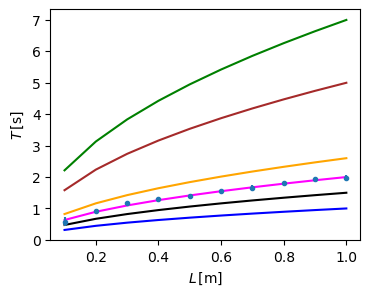

In [30]:
plt.figure(figsize=(4,3))

plt.plot(l, with_guess1, color = "blue")
plt.plot(l, with_guess2, color = "green")
plt.plot(l, with_guess3, color = "brown")
plt.plot(l, with_guess4, color = "black")
plt.plot(l, with_guess5, color = "orange")
plt.plot(l, with_guess6, color = "magenta")

plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

In [31]:
# Take the initial guess -> ansatsz (educated guess)
beta_0 = np.array((10.))

# Call the minimisation routine
res_pendulum = opt.minimize(chi_sqr_stat, beta_0)

# Print the result:
print(res_pendulum)

# Print the result:
print("Best-fit value is: ", res_pendulum.x[0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 25.982956559765892
        x: [ 2.022e+00]
      nit: 4
      jac: [ 7.868e-06]
 hess_inv: [[ 2.657e-05]]
     nfev: 10
     njev: 5
Best-fit value is:  2.0219601061213783


In [32]:
# Evaluate l in the regression model
mean_t_chi = fit_model(l, res_pendulum.x[0])

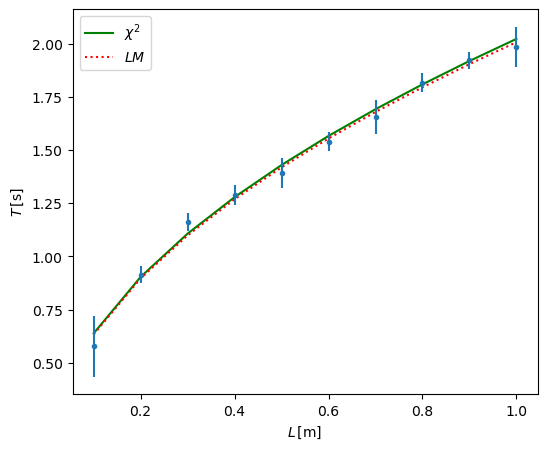

In [33]:
plt.figure(figsize=(6,5))

plt.plot(l, mean_t_chi, color = "green", label=r"$\chi^2$")
plt.plot(l, mean_t_fit, color = "red", linestyle = ":", label=r"$LM$")
plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")


plt.legend()
plt.show()

In [34]:
print("g in m/s^2= ", (2*np.pi/res_pendulum.x)**2)

g in m/s^2=  [9.65638497]


## Goodness of fit

In [36]:
print(res_pendulum.x[0])

chi_stat = chi_sqr_stat(res_pendulum.x[0])

print("chi^2 value: ", chi_stat)

chi_stat2 = chi_sqr_stat(2.05)

print("chi^2 value: ", chi_stat2)

chi_stat3 = chi_sqr_stat(1.95)

print("chi^2 value: ", chi_stat3)


2.0219601061213783
chi^2 value:  25.982956559765892
chi^2 value:  40.78107495148937
chi^2 value:  123.44548439557943


In this case, since we have just one free parammeter for our model, we have to minimize a line.

In [37]:
# Vector for chi^2
beta_vector = np.arange(1., 3., 0.001)

# Evaluate our functional using the above vector

# Empty list
chi_vector = []

for i in range(len(beta_vector)):
    chi_vector.append(chi_sqr_stat(beta_vector[i])) #evaluate the chi_stat on every point of beta_vector

chi_vector = np.array(chi_vector)
#print(beta_vector.shape, chi_vector.shape)

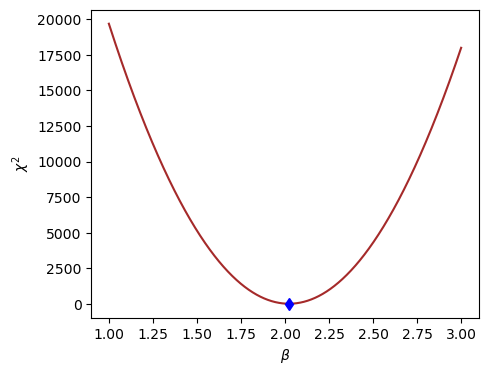

In [38]:
# Plotting chi^2

plt.figure(figsize=(5,4))

plt.plot(beta_vector, chi_vector, color = "brown", linestyle = "-")

plt.plot(res_pendulum.x, chi_stat, color = "blue", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\chi^2$")

plt.show()

## Reduced $\chi²$

In [39]:
# Calculate nu:

nu = len(l) - len(res_pendulum.x)

print("The # of degrees of freedom is: ", nu)


# Reduced chi^2 value is:

red_chi = chi_stat/nu

print("The reduced chi^2 stat is: ", red_chi)

The # of degrees of freedom is:  9
The reduced chi^2 stat is:  2.886995173307321


So the fitting was ok.

# Example 2: spectral fitting via $\chi²$
Generate a synthetic spectrum

In [41]:
### Gaussian function:

def gaussian_x(x_val, mu, sigma):
    """
    This return the values for a normal distro.
    Inputs: x_val -> x axis, mu -> mean, sigma -> std. dev.
    Output: y_val
    """
    
    # Code the Gaussian
    coef_g = 1./(sigma*(np.sqrt(2*np.pi)))
    
    y_val = coef_g*np.exp(-0.5*(x_val - mu)**2/sigma**2)
    
    return y_val  

In [42]:
# Evaluate the function

mu_1 = 5.0
sigma_1 = 0.5

n_points = 100

x_val = np.linspace(0., 10., n_points)

y_val = gaussian_x(x_val, mu_1, sigma_1)

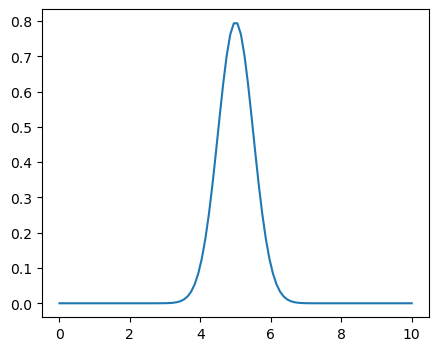

In [43]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val)

plt.show()

In [44]:
# Add the noise

# Fix the seed
np.random.seed(77)

# Generate noise
n_val = 0.05*np.random.normal(0., 1., size = (n_points,)) #0.05 is the amplitude

print(y_val.shape, n_val.shape)

# Add the noise values to the Gaussian

y_val_wnoise = y_val + n_val

# Add the baseline
b_val = 0.5

# Our final mock spectral line
y_val_final = y_val + n_val + b_val 

(100,) (100,)


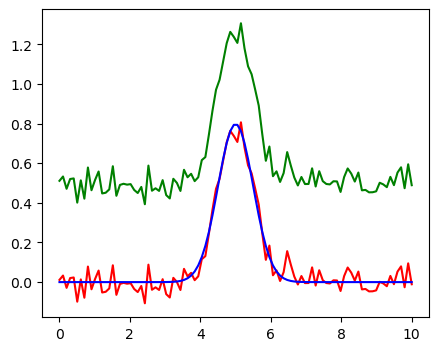

In [46]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val_final, color = "green")

plt.plot(x_val, y_val_wnoise, color = "red")

plt.plot(x_val, y_val, color = "blue") #displace the distribution to 0.5, so we don't have negative values


plt.show()

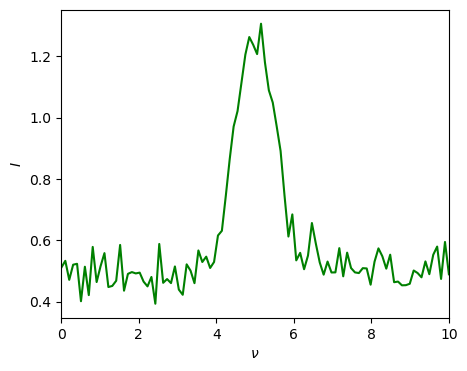

In [47]:
plt.figure(figsize=(5,4))

plt.plot(x_val, y_val_final, color = "green")

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.show()

In [60]:
# Random errors

i_errors = 0.5*np.random.normal(0., 0.2, size = (n_points,))

#print(i_errors)

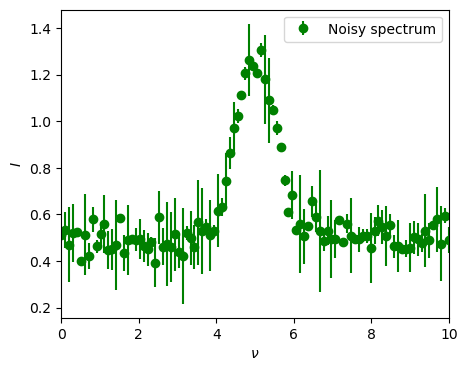

In [49]:
plt.figure(figsize=(5,4))

#plt.plot(x_val, y_val_final, color = "green")

plt.errorbar(x_val, y_val_final, abs(i_errors), color = "green",\
            fmt = "o", label = "Noisy spectrum") 

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.legend()

plt.show()

## LM fitting

In [50]:
### Objective function:

def gaussian_fit(x_val, mu, sigma, base):
    """
    This return the values for a normal distro.
    Inputs: x_val -> x axis, mu -> mean, sigma -> std. dev.
    Output: y_val
    """
    
    # Code the Gaussian
    coef_g = 1./(sigma*(np.sqrt(2*np.pi)))
    
    y_val = base + coef_g*np.exp(-0.5*(x_val - mu)**2/sigma**2)
    
    return y_val  

In [51]:
# Using the LM method (without sigmas)

coef_lm, cova_lm = opt.curve_fit(gaussian_fit, x_val, y_val_final)

print("Best-fit parameters", coef_lm)

print("Associate uncertainties:", np.sqrt(np.diag(cova_lm)))

Best-fit parameters [5.00682561 0.50943988 0.49901786]
Associate uncertainties: [0.01442661 0.01177927 0.00468842]


## $\chi^2$ fitting

In [53]:
# Using the LM method (with sigmas)

coef_chi, cova_chi = opt.curve_fit(gaussian_fit, x_val, y_val_final, \
                                sigma = i_errors) #adding the uncertainties to curve_fit, makes it calculate using chi squared

print("Best-fit parameters", coef_chi)

print("Associate uncertainties:", np.sqrt(np.diag(cova_chi)))

Best-fit parameters [5.0092785  0.51435322 0.51226831]
Associate uncertainties: [0.03175781 0.03898722 0.00482489]


In [54]:
# Evaluate the LM regression model

y_lm  = gaussian_fit(x_val, *coef_lm)

# Evaluate the chi^2 regression model

y_chi  = gaussian_fit(x_val, *coef_chi)

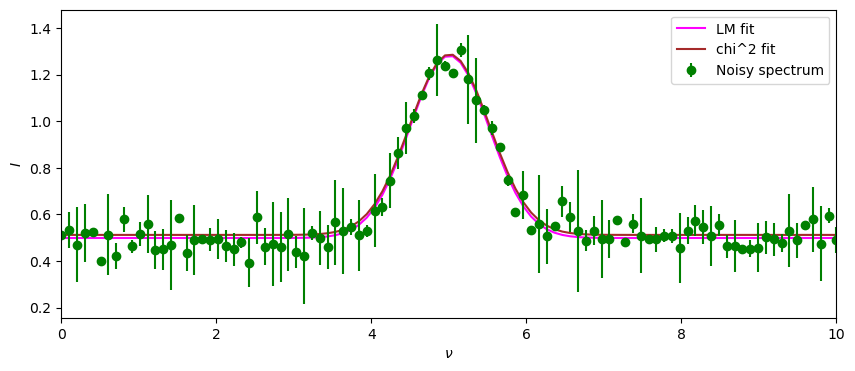

In [55]:
plt.figure(figsize=(10,4))

plt.plot(x_val, y_lm, color = "magenta", label ="LM fit")
plt.plot(x_val, y_chi, color = "brown", label ="chi^2 fit")

plt.errorbar(x_val, y_val_final, abs(i_errors), color = "green",\
            fmt = "o", label = "Noisy spectrum") 

plt.xlim(0.,10.)

plt.xlabel(r"$\nu$")

plt.ylabel(r"$I$")

plt.legend()

plt.show()

We still need to calculate the goodness of the $\chi²$ fitting.

In [56]:
# Define a functional/chi^2 statistic

def chi_sqr_spectral(fex, fit, sigma):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    
    # Use the chi^2 formula
    chi_sqr = np.sum((fex - fit)**2/(sigma)**2)
    
    return chi_sqr

In [57]:
# Compute the chi^2 values

chi_spect_lm = chi_sqr_spectral(y_val_final, y_lm, i_errors)

chi_spect_ch = chi_sqr_spectral(y_val_final, y_chi, i_errors)

print("chi^2 for the LM fit: ", chi_spect_lm)
print("chi^2 for the chi^2 fit: ", chi_spect_ch)

chi^2 for the LM fit:  3704.0569446010377
chi^2 for the chi^2 fit:  3431.8674229867142


In [58]:
# Let us compute nu 

nu_spect = len(y_val_final) - len(coef_chi)

print(nu_spect)

97


In [59]:
# Reduced chi^2 stats:

chi_red_lm = chi_spect_lm/nu_spect

chi_red_ch = chi_spect_ch/nu_spect

print("Reduced chi^2 for the LM fit: ", chi_red_lm)
print("Reduced chi^2 for the chi^2 fit: ", chi_red_ch)

Reduced chi^2 for the LM fit:  38.186154068051934
Reduced chi^2 for the chi^2 fit:  35.38007652563623


It is a good fit. Note that the bumps on the sides have large errors associated with the data points. Then, to improve this we will have to retake the data and see wether the errors decrease or not.